In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/MyDrive/weather_data_124b.csv'

import pandas as pd
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df

Mounted at /content/drive


,Date_time,WY,Year,Month,Day,Hour,Minute,T_a,RH,e_a,T_d,S_i,w_s,w_d
0,10/1/2003 0:00,2004,2003,10,1,0,0,17.2,0.28,549,-1.3,0,0.7,255.5
1,10/1/2003 1:00,2004,2003,10,1,1,0,16.3,0.30,556,-1.1,0,0.9,240.7
2,10/1/2003 2:00,2004,2003,10,1,2,0,15.6,0.33,584,-0.5,0,0.7,142.0
3,10/1/2003 3:00,2004,2003,10,1,3,0,14.2,0.36,582,-0.6,0,0.6,6.5
4,10/1/2003 4:00,2004,2003,10,1,4,0,14.2,0.38,615,0.1,0,0.6,332.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,9/30/2014 19:00,2014,2014,9,30,19,0,6.1,0.67,630,0.4,12,0.9,311.0
96428,9/30/2014 20:00,2014,2014,9,30,20,0,3.6,0.78,616,0.1,0,0.5,130.0
96429,9/30/2014 21:00,2014,2014,9,30,21,0,2.3,0.83,598,-0.2,0,0.6,328.0
96430,9/30/2014 22:00,2014,2014,9,30,22,0,2.2,0.87,622,0.3,0,0.5,218.0


In [ ]:
import pandas as pd

def duplicate_last_rows(df, n=50):
    """
    Duplicates the last n rows of a DataFrame and appends them to the end.

    Args:
        df (pd.DataFrame): The input DataFrame.
        n (int): The number of last rows to duplicate.

    Returns:
        pd.DataFrame: A new DataFrame with the duplicated rows appended.
    """
    if n > len(df):
        raise ValueError("n cannot be larger than the DataFrame length")

    last_rows = df.tail(n)
    df_duplicated = pd.concat([df, last_rows], ignore_index=True)
    return df_duplicated

if __name__ == '__main__':
  df_duplicated = duplicate_last_rows(df)
  df = df_duplicated
df

,Date_time,WY,Year,Month,Day,Hour,Minute,T_a,RH,e_a,T_d,S_i,w_s,w_d
0,10/1/2003 0:00,2004,2003,10,1,0,0,17.2,0.28,549,-1.3,0,0.7,255.5
1,10/1/2003 1:00,2004,2003,10,1,1,0,16.3,0.30,556,-1.1,0,0.9,240.7
2,10/1/2003 2:00,2004,2003,10,1,2,0,15.6,0.33,584,-0.5,0,0.7,142.0
3,10/1/2003 3:00,2004,2003,10,1,3,0,14.2,0.36,582,-0.6,0,0.6,6.5
4,10/1/2003 4:00,2004,2003,10,1,4,0,14.2,0.38,615,0.1,0,0.6,332.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96477,9/30/2014 19:00,2014,2014,9,30,19,0,6.1,0.67,630,0.4,12,0.9,311.0
96478,9/30/2014 20:00,2014,2014,9,30,20,0,3.6,0.78,616,0.1,0,0.5,130.0
96479,9/30/2014 21:00,2014,2014,9,30,21,0,2.3,0.83,598,-0.2,0,0.6,328.0
96480,9/30/2014 22:00,2014,2014,9,30,22,0,2.2,0.87,622,0.3,0,0.5,218.0


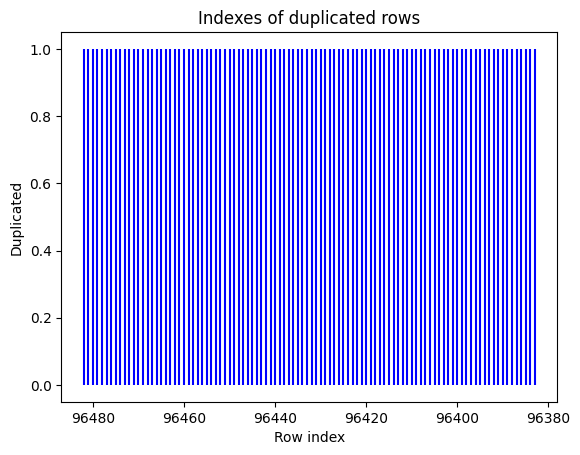

Number of duplicate rows: 50. This data is inconsistent.
Row Count with duplicates: 96482.


In [ ]:
import matplotlib.pyplot as plt
duplicates = df[df.duplicated(keep=False)]
  # Create a DataFrame to represent the duplicated rows and its indices
duplicated_rows = pd.DataFrame({
    'duplicated': df.duplicated(keep=False),
    'row': range(1, len(df) + 1)
    })
duplicated_rows = duplicated_rows[duplicated_rows['duplicated']]

# Plot vertical lines at the index of the duplicated rows
plt.figure()
plt.vlines(duplicated_rows['row'], ymin=0, ymax=1, colors='blue')
plt.gca().invert_xaxis()
plt.title('Indexes of duplicated rows')
plt.xlabel('Row index')
plt.ylabel('Duplicated')
plt.show()

# Identify duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}. This data is inconsistent.")
row_count = len(df)
print(f"Row Count with duplicates: {row_count}.")

In [ ]:
def remove_duplicate_rows(df, subset_columns=None, keep='first'):
    """
    Removes duplicate rows from a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        subset_columns (list, optional): List of column names to consider for identifying duplicates.
            If None, all columns will be considered. Defaults to None.
        keep (str, optional): Specifies which duplicates to keep.
            'first': Keep the first occurrence.
            'last': Keep the last occurrence.
            False: Drop all duplicates. Defaults to 'first'.

    Returns:
        pd.DataFrame: A new DataFrame with duplicate rows removed.
    """

    df_no_duplicates = df.drop_duplicates(subset=subset_columns, keep=keep)
    return df_no_duplicates

if __name__ == '__main__':
  df_no_duplicates_all = remove_duplicate_rows(df)
  row_count = len(df_no_duplicates_all)
  print(f"Row Count: {row_count}.")
  print()

duplicate_count = df_no_duplicates_all.duplicated().sum()

# Print the count of duplicates
print(f"Number of duplicate rows: {duplicate_count}. This data is consistent.")
print()
print("DataFrame with duplicates removed based on all columns:\n", df_no_duplicates_all)

Row Count: 96432.

Number of duplicate rows: 0. This data is consistent.

DataFrame with duplicates removed based on all columns:
              Date_time    WY  Year  Month  Day  Hour  Minute   T_a    RH  e_a  \
0       10/1/2003 0:00  2004  2003     10    1     0       0  17.2  0.28  549   
1       10/1/2003 1:00  2004  2003     10    1     1       0  16.3  0.30  556   
2       10/1/2003 2:00  2004  2003     10    1     2       0  15.6  0.33  584   
3       10/1/2003 3:00  2004  2003     10    1     3       0  14.2  0.36  582   
4       10/1/2003 4:00  2004  2003     10    1     4       0  14.2  0.38  615   
...                ...   ...   ...    ...  ...   ...     ...   ...   ...  ...   
96427  9/30/2014 19:00  2014  2014      9   30    19       0   6.1  0.67  630   
96428  9/30/2014 20:00  2014  2014      9   30    20       0   3.6  0.78  616   
96429  9/30/2014 21:00  2014  2014      9   30    21       0   2.3  0.83  598   
96430  9/30/2014 22:00  2014  2014      9   30    22       